In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\arack\Desktop\All India Consumer Price Index (RuralUrban) upto March 2023.csv")

In [3]:
data.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               351 non-null    object 
 1   Year                                 351 non-null    int64  
 2   Month                                351 non-null    object 
 3   Cereals and products                 348 non-null    float64
 4   Meat and fish                        345 non-null    float64
 5   Egg                                  348 non-null    float64
 6   Milk and products                    348 non-null    float64
 7   Oils and fats                        348 non-null    float64
 8   Fruits                               348 non-null    float64
 9   Vegetables                           348 non-null    float64
 10  Pulses and products                  348 non-null    float64
 11  Sugar and Confectionery         

In [5]:
data.describe()

,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,351.000000,348.000000,345.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,...,345.000000,348.000000,345.000000,348.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,2017.410256,134.525575,152.969855,138.420977,138.160345,129.232759,139.295402,155.286207,139.583908,110.283046,...,139.120870,133.768966,134.455942,135.846264,124.922319,131.687536,139.045217,130.515362,131.848406,137.280290
std,2.848018,12.485949,31.463194,20.830019,16.562281,28.284529,16.580111,28.353826,23.398664,8.880946,...,18.768796,19.816880,17.557135,21.667617,17.336581,18.568249,20.017630,20.665874,18.948498,18.687957
min,2013.000000,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,...,105.800000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,2015.000000,124.000000,128.600000,121.600000,127.600000,110.175000,129.550000,133.375000,119.100000,103.100000,...,124.100000,115.775000,120.200000,117.700000,111.500000,116.300000,122.000000,112.300000,116.100000,121.700000
50%,2017.000000,134.800000,143.500000,133.550000,139.750000,118.950000,139.400000,152.950000,136.750000,112.800000,...,139.700000,129.750000,133.600000,131.300000,118.800000,128.300000,137.600000,125.500000,127.700000,134.800000
75%,2020.000000,144.825000,183.900000,151.500000,153.300000,133.475000,150.525000,170.775000,163.800000,117.100000,...,151.100000,146.500000,148.700000,153.475000,135.000000,146.500000,156.700000,151.200000,146.200000,151.800000
max,2022.000000,166.400000,223.400000,185.000000,171.000000,209.900000,179.500000,245.300000,191.600000,123.900000,...,185.900000,180.800000,174.400000,181.200000,167.400000,170.600000,176.500000,172.300000,173.900000,177.900000


In [6]:
data.shape

(351, 30)

In [7]:
data.isna().sum()

Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                117
Fuel and light                           3
Household goods and services             6
Health     

<div style="text-align: center; color: black; font-size: 30px; font-weight: bold;">Data Preparation</div>

In [16]:
# Drop the 'Housing' column from the dataset since 117 null values
data = data.drop(columns=['Housing'])
data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,106.4,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.8,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,106.2,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,107.0,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,106.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Urban,2022,September,164.9,213.7,170.9,170.1,179.3,167.5,220.8,...,173.0,179.2,165.0,173.8,158.2,165.8,170.9,171.1,166.1,174.1
347,Rural+Urban,2022,September,163.5,209.2,169.7,169.7,188.7,165.7,191.8,...,179.9,179.5,169.5,177.8,162.3,167.6,173.1,170.9,169.7,175.3
348,Rural,2022,October,164.7,208.8,170.3,170.9,191.6,162.2,184.8,...,185.9,180.8,174.4,181.2,167.4,170.6,176.5,172.0,173.9,177.9
349,Urban,2022,October,166.4,214.9,171.9,171.0,177.7,165.7,228.6,...,173.6,180.0,166.0,174.7,158.8,166.3,171.2,172.3,166.8,175.3


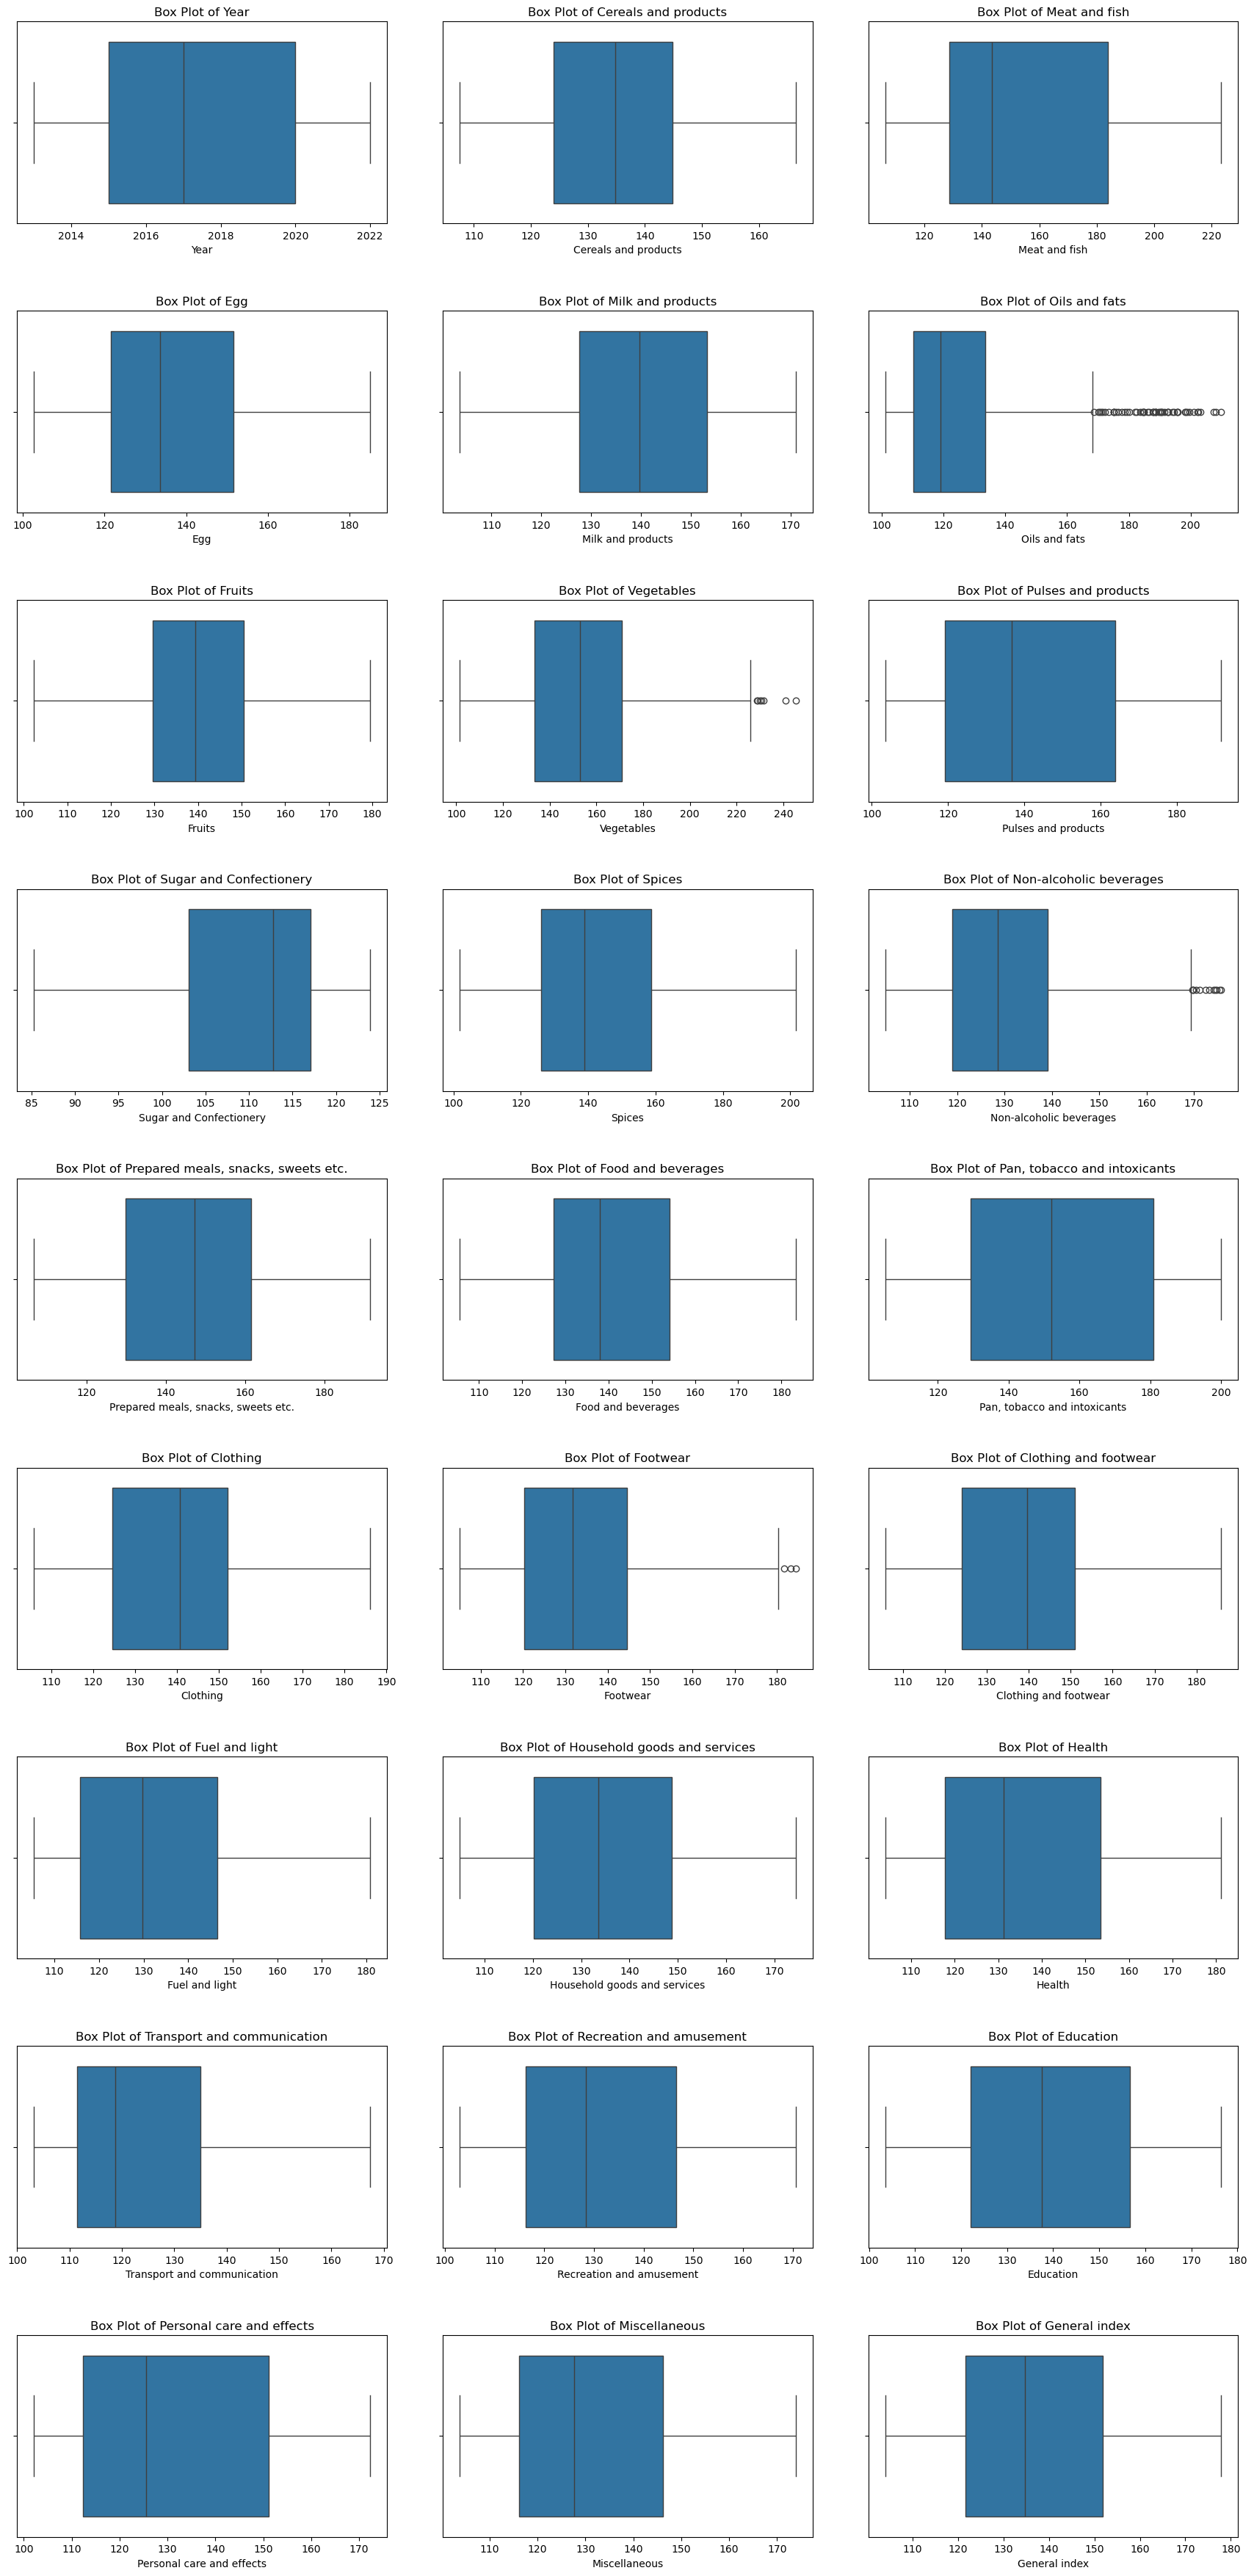

In [18]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
num_plots = len(numerical_columns)

# Set number of columns and compute number of rows
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Or axes[j].axis('off') if you prefer

fig.tight_layout(pad=4.0)
plt.show()

In [19]:
outlier_cols = ['Footwear', 'Vegetables', 'Non-alcoholic beverages', 'Oils and fats']

for col in outlier_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


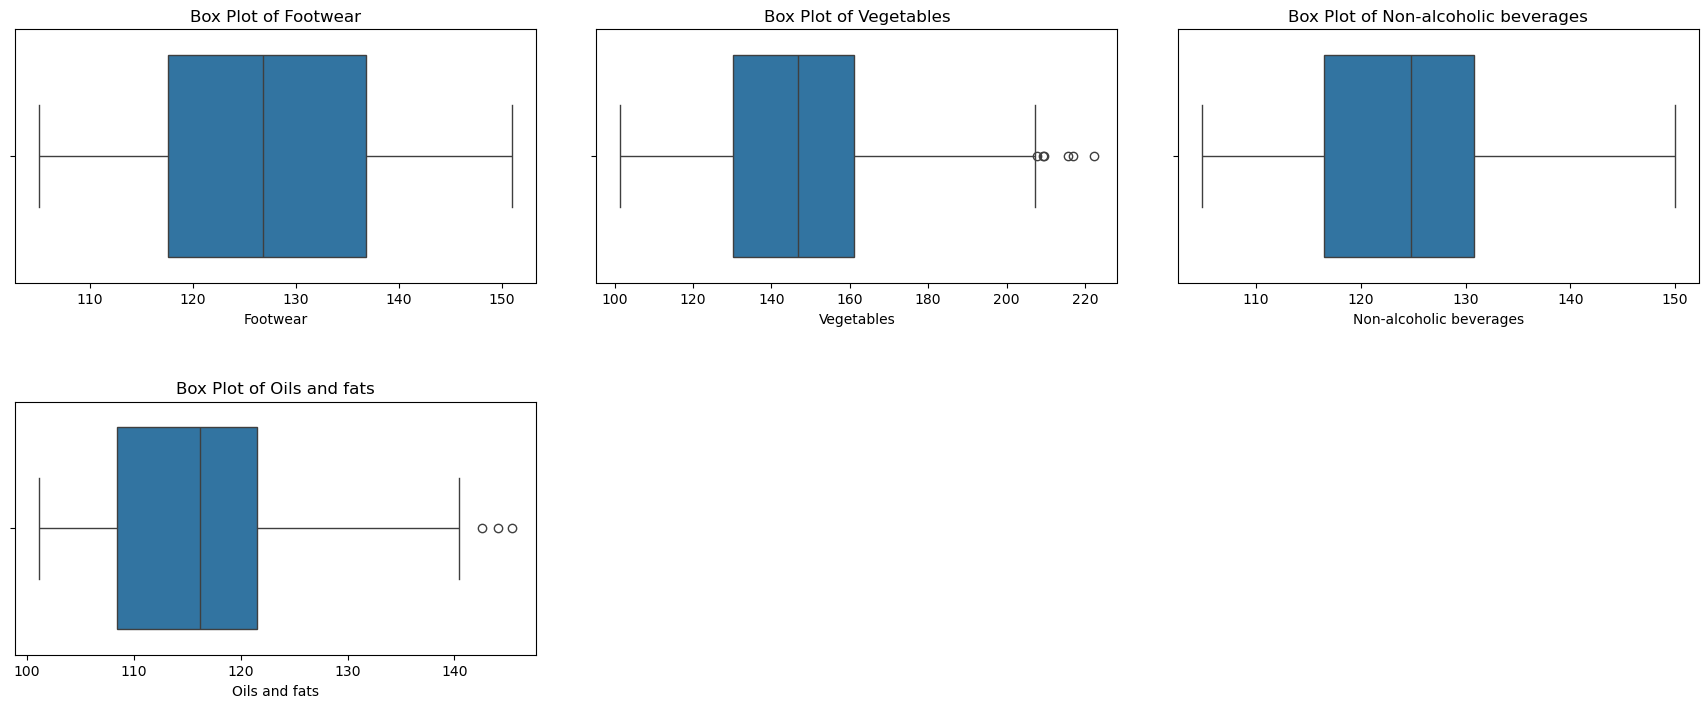

In [20]:
# Columns to plot
plot_columns = ['Footwear', 'Vegetables', 'Non-alcoholic beverages', 'Oils and fats']
num_plots = len(plot_columns)

# Set number of columns and compute number of rows
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each boxplot
for i, column in enumerate(plot_columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Or axes[j].axis('off') if you prefer

fig.tight_layout(pad=4.0)
plt.show()


In [21]:
data.isna().sum()

Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Fuel and light                         0
Household goods and services           0
Health                                 0
Transport and communication            0
Recreation and a

In [22]:
unique_months = data['Month'].unique()  # Get unique values
unique_months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Marcrh'],
      dtype=object)

In [23]:
data['Month'] = data['Month'].replace('Marcrh', 'March')
unique_months = data['Month'].unique() 
unique_months 

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

<div style="text-align: center; color: black; font-size: 50px; font-weight: bold;">EDA</div>


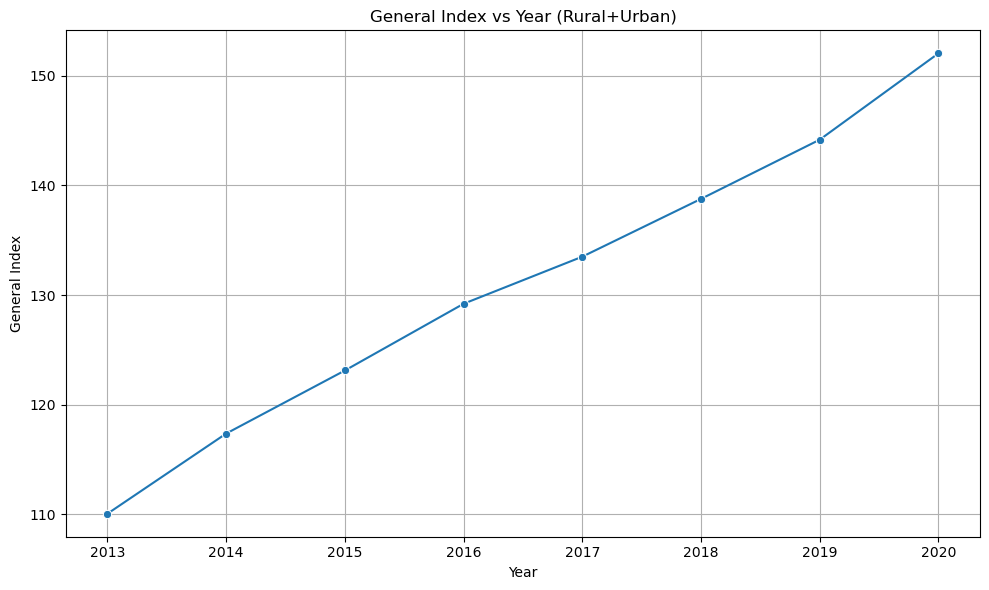

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Rural+Urban sector
rural_urban_data = data[data['Sector'] == 'Rural+Urban']

# Group by Year and calculate mean General index per year
yearly_index = rural_urban_data.groupby('Year')['General index'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='General index', data=yearly_index, marker='o')
plt.title('General Index vs Year (Rural+Urban)')
plt.xlabel('Year')
plt.ylabel('General Index')
plt.grid(True)
plt.tight_layout()
plt.show()


<style>
  body {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background-color: #f8fafc;
  }

  .container {
    max-width: 900px;
    margin: 40px auto;
    background: linear-gradient(to right, #f0f9ff, #ffffff);
    padding: 40px 50px;
    border-radius: 18px;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.08);
    animation: fadeIn 0.7s ease-in-out;
  }

  @keyframes fadeIn {
    from { opacity: 0; transform: translateY(20px); }
    to { opacity: 1; transform: translateY(0); }
  }

  h1 {
    font-size: 2.6rem;
    text-align: center;
    color: #0f172a;
    margin-bottom: 40px;
  }

  h2 {
    font-size: 1.8rem;
    color: #2563eb;
    border-bottom: 2px solid #c7d2fe;
    padding-bottom: 10px;
    margin-top: 40px;
  }

  h3 {
    font-size: 1.4rem;
    color: #1e293b;
    margin-top: 25px;
  }

  ul {
    list-style: none;
    padding-left: 0;
  }

  li {
    position: relative;
    padding-left: 30px;
    margin-bottom: 16px;
    font-size: 1.05rem;
    line-height: 1.7;
  }

  li::before {
    content: "✅";
    position: absolute;
    left: 0;
    top: 3px;
  }

  .highlight {
    background-color: #dbeafe;
    padding: 3px 8px;
    border-radius: 6px;
    font-weight: 600;
    color: #1e40af;
  }

  .section {
    background-color: #f1f5f9;
    padding: 22px 28px;
    border-left: 6px solid #60a5fa;
    border-radius: 12px;
    margin-top: 28px;
  }

  .tag {
    display: inline-block;
    background-color: #e0f2fe;
    color: #0c4a6e;
    font-size: 0.9rem;
    padding: 6px 12px;
    border-radius: 8px;
    font-weight: bold;
    margin-bottom: 10px;
  }

  .note {
    background-color: #fef3c7;
    color: #92400e;
    padding: 20px 24px;
    border-left: 6px solid #fbbf24;
    border-radius: 10px;
    font-weight: 500;
    margin-top: 40px;
    font-size: 1.05rem;
  }
</style>

<div class="container">
  <h1>📊 General Index Insights</h1>

  <h2>Core Insight: Consistent and Predictable Growth</h2>
  <ul>
    <li><strong>Steady Upward Trend:</strong> The index showed uninterrupted growth from <span class="highlight">2013 to 2020</span>, suggesting a strong, reliable driver.</li>
    <li><strong>Nearly Linear Growth:</strong> Annual increases were consistent (<span class="highlight">around 5–7 points</span>), enabling easy forecasting.</li>
    <li><strong>Significant Cumulative Growth:</strong> From <span class="highlight">~110</span> in 2013 to <span class="highlight">~152</span> in 2020 — a <span class="highlight">38% rise</span> in 8 years.</li>
  </ul>

  <h2>Context-Dependent Insights</h2>
  <p>The true meaning depends on what the <strong>"General Index"</strong> measures. Here's how to interpret the data across different scenarios:</p>

  <div class="section">
    <div class="tag">📦 CPI - Consumer Price Index</div>
    <h3>📈 If it’s a Consumer Price Index:</h3>
    <ul>
      <li><strong>Insight:</strong> Cost of living rose steadily.</li>
      <li><strong>Implication:</strong> Inflation eroded purchasing power; wages needed to rise <span class="highlight">>38%</span> to keep up.</li>
    </ul>
  </div>

  <div class="section">
    <div class="tag">🏭 GDP / Economic Output</div>
    <h3>🏭 If it’s an Economic Output Index:</h3>
    <ul>
      <li><strong>Insight:</strong> Sustained expansion of industrial/economic activity.</li>
      <li><strong>Implication:</strong> Strong business climate, job creation, and investor confidence.</li>
    </ul>
  </div>

  <div class="section">
    <div class="tag">💼 Wage Index</div>
    <h3>💼 If it’s a Wage Growth Index:</h3>
    <ul>
      <li><strong>Insight:</strong> Nominal wages grew consistently.</li>
      <li><strong>Implication:</strong> Real wage impact depends on comparison with inflation.</li>
    </ul>
  </div>

  <div class="section">
    <div class="tag">🏠 Real Estate or Assets</div>
    <h3>🏠 If it’s a Real Estate or Asset Market Index:</h3>
    <ul>
      <li><strong>Insight:</strong> Asset prices (e.g., property) rose steadily.</li>
      <li><strong>Implication:</strong> Long-term profitable period for investors in this market.</li>
    </ul>
  </div>

  <div class="note">
    📌 <strong>Next Step:</strong> Confirm what the <strong>"General Index"</strong> actually measures — CPI, GDP, wages, real estate, etc. Only then can its trend be interpreted for policy, planning, or investment.
  </div>
</div>


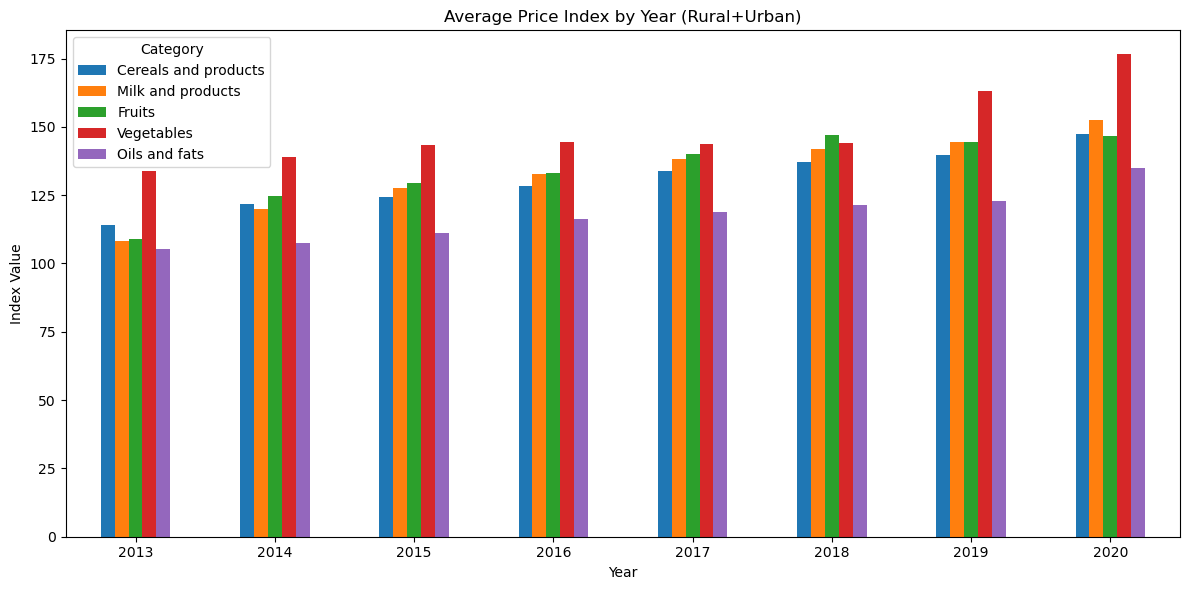

In [29]:

# Define target columns
cols = ['Cereals and products', 'Milk and products', 'Fruits', 'Vegetables', 'Oils and fats']

# Filter for Rural+Urban
filtered = data[data['Sector'] == 'Rural+Urban']

# Group by year and calculate mean of selected columns
yearly_avg = filtered.groupby('Year')[cols].mean()

# Plot as grouped bar chart
yearly_avg.plot(kind='bar', figsize=(12, 6))
plt.title("Average Price Index by Year (Rural+Urban)")
plt.ylabel("Index Value")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.tight_layout()
plt.show()



<style>
  @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;600;700&display=swap');

  .analysis-container {
    max-width: 800px;
    margin: 30px auto;
    font-family: 'Poppins', 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background: #fff;
    padding: 35px 45px;
    border-radius: 18px;
    box-shadow: 0 12px 40px rgba(66, 153, 225, 0.15);
    color: #1a202c;
    line-height: 1.6;
    position: relative;
    overflow: hidden;
  }

  /* Floating cute emoji animation */
  .floating-emoji {
    position: absolute;
    font-size: 2.5rem;
    animation: float 5s ease-in-out infinite;
    opacity: 0.15;
    user-select: none;
  }
  .emoji-top-left { top: 10px; left: 15px; animation-delay: 0s;}
  .emoji-top-right { top: 20px; right: 20px; animation-delay: 2s;}
  .emoji-bottom-left { bottom: 15px; left: 30px; animation-delay: 4s;}
  .emoji-bottom-right { bottom: 10px; right: 25px; animation-delay: 1s;}

  @keyframes float {
    0%, 100% { transform: translateY(0) translateX(0); }
    50% { transform: translateY(-15px) translateX(8px); }
  }

  h2 {
    color: #3b82f6;
    margin-bottom: 24px;
    font-weight: 700;
    border-bottom: 3px solid #bfdbfe;
    padding-bottom: 10px;
    font-size: 2rem;
    display: flex;
    align-items: center;
    gap: 10px;
  }

  h2 .title-icon {
    font-size: 2.2rem;
  }

  h3 {
    margin-top: 32px;
    color: #4a5568;
    font-weight: 600;
    font-size: 1.35rem;
    background: #f0f9ff;
    padding: 12px 16px;
    border-left: 6px solid #3b82f6;
    border-radius: 0 8px 8px 0;
    display: flex;
    align-items: center;
    gap: 8px;
  }

  p {
    margin: 18px 0;
    font-size: 1.1rem;
    color: #4a5568;
  }

  ul {
    margin-left: 24px;
    margin-top: 14px;
    padding-left: 0;
  }

  ul li {
    margin-bottom: 14px;
    font-size: 1.05rem;
    position: relative;
    padding-left: 28px;
    list-style-type: none;
  }

  ul li:before {
    content: "✨";
    color: #3b82f6;
    font-size: 1.3rem;
    position: absolute;
    left: 0;
    top: -2px;
  }

  .highlight {
    font-weight: 700;
    color: #f59e0b;
    background: #fffbeb;
    padding: 3px 6px;
    border-radius: 6px;
    box-shadow: 0 0 5px #fbbf24aa;
  }

  .category-tag {
    display: inline-block;
    padding: 4px 14px;
    border-radius: 16px;
    font-weight: 700;
    font-size: 1rem;
    margin-right: 8px;
    box-shadow: 0 3px 8px rgb(0 0 0 / 0.07);
    user-select: none;
    transition: transform 0.3s ease;
    cursor: default;
  }

  .category-tag:hover {
    transform: scale(1.1);
    box-shadow: 0 6px 15px rgb(59 130 246 / 0.3);
  }

  .vegetables {
    background: #fed7d7;
    color: #c53030;
  }

  .oils {
    background: #e9d8fd;
    color: #6b46c1;
  }

  .milk {
    background: #feebc8;
    color: #9c4221;
  }

  .cereals {
    background: #bfdbfe;
    color: #2563eb;
  }

  .fruits {
    background: #c6f6d5;
    color: #276749;
  }

  .divider {
    margin: 42px 0;
    height: 2px;
    background: linear-gradient(to right, transparent, #93c5fd, transparent);
    border: none;
    border-radius: 8px;
  }

  .key-point {
    background: #e0f2fe;
    padding: 20px 24px;
    border-radius: 12px;
    margin: 28px 0;
    border-left: 6px solid #3b82f6;
    box-shadow: 0 10px 30px #93c5fd33;
    position: relative;
    font-size: 1.05rem;
    color: #1e40af;
  }

  .key-point-title {
    font-weight: 700;
    color: #2563eb;
    margin-bottom: 12px;
    display: flex;
    align-items: center;
    gap: 10px;
  }

  .key-point-title:before {
    content: "👉";
    font-size: 1.6rem;
  }

  .summary-box {
    background: #d1fae5;
    padding: 24px 28px;
    border-radius: 16px;
    border-left: 8px solid #22c55e;
    margin-top: 36px;
    box-shadow: 0 10px 25px #22c55e55;
    color: #166534;
    font-size: 1.15rem;
  }

  .summary-title {
    font-weight: 800;
    color: #15803d;
    margin-bottom: 14px;
    font-size: 1.4rem;
    display: flex;
    align-items: center;
    gap: 12px;
  }

  .summary-title:before {
    content: "📌";
    font-size: 1.7rem;
  }
</style>

<div class="analysis-container">
  <!-- Floating Emojis for fun vibe -->
 

  <h2><span class="title-icon">📊</span> Food Price Trends Analysis (2013-2020)</h2>
  
  <div class="key-point">
    <div class="key-point-title">Chart Type <span>📈</span></div>
    <p>This <span class="highlight">grouped bar chart</span> titled <em>"Average Price Index by Year (Rural+Urban)"</em> shows annual averages for five food categories, making it perfect for:</p>
    <ul>
      <li>Tracking long-term trends for each food category 🔍</li>
      <li>Comparing relative costs between categories in any given year 💸</li>
    </ul>
  </div>

  <hr class="divider">

  <h2><span class="title-icon">✨</span> Key Findings</h2>

  <h3><span>📈</span> 1. Universal Price Increases</h3>
  <p>Every category shows consistent annual growth, with no year showing average price decreases across all food types. 🔥</p>

  <h3><span class="category-tag vegetables">🥦 Vegetables</span> - The Costliest Category</h3>
  <p>Dominating the price index in most years (2013, 2015-2016, 2019-2020), vegetables consistently demanded the highest budget allocation. 🥇</p>

  <h3><span class="category-tag oils">🛢️ Oils & Fats</span> - Most Affordable</h3>
  <p>Maintaining the lowest price index throughout all years, this category remained the most budget-friendly option. 💰</p>

  <div class="key-point">
    <div class="key-point-title">Notable Trend <span>🚀</span></div>
    <p><span class="category-tag milk">🥛 Milk Products</span> surpassed <span class="category-tag cereals">🌾 Cereals</span> in cost around 2016, showing faster price growth in the latter half of the period.</p>
  </div>

  <h3><span>⚠️</span> 4. Accelerating Inflation</h3>
  <p>The most dramatic price jumps occurred in 2019-2020, suggesting increasing inflationary pressure on food prices. 📈🔥</p>

  <hr class="divider">

  <div class="summary-box">
    <div class="summary-title">The Big Picture <span>🌍</span></div>
    <p>The data reveals <span class="highlight">sustained food inflation</span> across all categories from 2013-2020, with a clear cost hierarchy:</p>
    <ul>
      <li><span class="category-tag vegetables">🥦 Vegetables</span> - Highest average costs 💸</li>
      <li><span class="category-tag milk">🥛 Milk</span> - Faster rising costs than cereals 🚀</li>
      <li><span class="category-tag cereals">🌾 Cereals</span> - Moderate price growth 📈</li>
      <li><span class="category-tag oils">🛢️ Oils/Fats</span> - Most affordable 💰</li>
    </ul>
    <p>The later years show particularly concerning acceleration in food price inflation. ⚠️</p>
  </div>
</div>


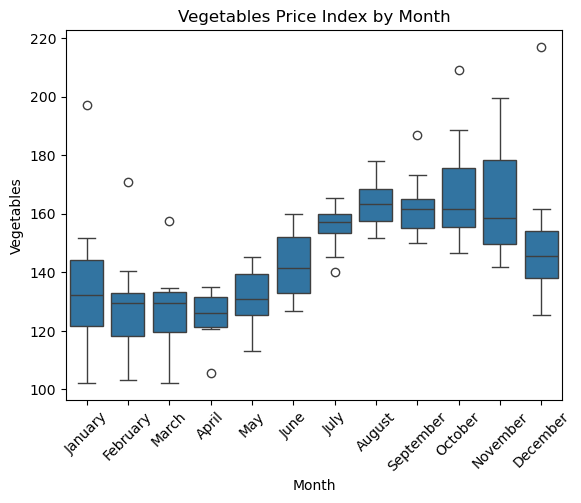

In [37]:
sns.boxplot(data=data[data['Sector'] == 'Rural+Urban'], x='Month', y='Vegetables') #The boxplot includes all "January" values from 2013 to March 2023 (the last available data point in your dataset
plt.title("Vegetables Price Index by Month")
plt.xticks(rotation=45)
plt.show()


<div style="font-family: Arial, sans-serif; max-width: 1800px; margin: auto; line-height: 1.6;">

  <h2>📊 <strong>Enhanced Analysis of the Boxplot: Vegetables Price Index by Month 🥦📅</strong></h2>
  <hr>

  <h3>1. 🌟 Overall Monthly Price Variation</h3>
  <ul>
    <li>The vegetable price index shows <strong>significant monthly fluctuations</strong> across the year.</li>
    <li>📈 <strong>Peak months:</strong> October, November, December</li>
    <li>📉 <strong>Lower price months:</strong> January through May</li>
  </ul>

  <h3>2. 📏 Median Price Comparison — Typical Prices</h3>
  <table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
    <thead style="background-color: #f2f2f2;">
      <tr>
        <th>Month</th>
        <th>Median Price Index</th>
        <th>Interpretation</th>
      </tr>
    </thead>
    <tbody>
      <tr><td>🥇 October</td><td>~175</td><td>High median price, peak season</td></tr>
      <tr><td>🥈 November</td><td>~180</td><td>Highest median, festive demand</td></tr>
      <tr><td>🥉 December</td><td>~165</td><td>High, but slightly lower than Nov</td></tr>
      <tr><td>❄️ January</td><td>~145</td><td>Low median, post-harvest period</td></tr>
      <tr><td>🌸 April</td><td>~135</td><td>Among the lowest, stable prices</td></tr>
    </tbody>
  </table>
  <p><strong>🏆 Highest median:</strong> November (~180) &nbsp;&nbsp;&nbsp; <strong>🥶 Lowest median:</strong> April & February (~135)</p>

  <h3>3. 🔄 Variability (IQR) & Stability</h3>
  <ul>
    <li><strong>Oct–Dec:</strong> Large boxes → <strong>Wide price variability</strong>, unstable market conditions influenced by weather, festive demand, supply constraints.</li>
    <li><strong>Jan–May:</strong> Smaller boxes → <strong>Stable prices</strong>, steady supply-demand balance.</li>
  </ul>

  <h3>4. ⚠️ Outliers — Extreme Price Spikes</h3>
  <ul>
    <li><strong>December:</strong> High outlier near <strong>220</strong>, possible floods/droughts or supply shocks.</li>
    <li><strong>January:</strong> Smaller outlier suggesting occasional unexpected spikes.</li>
  </ul>

  <h3>5. 🔍 Month-to-Month Comparison Highlights</h3>
  <table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
    <thead style="background-color: #f9f9f9;">
      <tr>
        <th>Comparison</th>
        <th>Median Price Difference</th>
        <th>Variability Difference</th>
        <th>Key Insight</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>📅 January vs December</td>
        <td>145 vs 165 (+20)</td>
        <td>Dec has wider IQR and longer whiskers</td>
        <td>Prices peak in December due to seasonality & demand</td>
      </tr>
      <tr>
        <td>📅 April vs October</td>
        <td>135 vs 175 (+40)</td>
        <td>October much more variable</td>
        <td>October is high-demand, April is stable low-price month</td>
      </tr>
      <tr>
        <td>📅 November vs May</td>
        <td>180 vs ~135 (+45)</td>
        <td>November highly variable, May stable</td>
        <td>November highest inflation pressures</td>
      </tr>
    </tbody>
  </table>

  <h3>6. 🌱 Seasonal Price Cycle Summary</h3>
  <ul>
    <li>🏵️ <strong>Peak Prices:</strong> Oct–Dec</li>
    <li>❄️ <strong>Low Prices:</strong> Jan–May</li>
    <li>🔄 Price changes driven by <em>harvest cycles, festival demand, climate impact</em></li>
  </ul>

  <h3>7. 📉 Additional Insights</h3>
  <ul>
    <li>🔥 <strong>Inflationary Pressure:</strong> Median price increases over recent years during peak months.</li>
    <li>🌦️ <strong>Supply-Demand Sensitivity:</strong> High variability in peak months due to weather & supply disruptions.</li>
    <li>🛡️ <strong>Policy Focus:</strong> Target interventions to smooth prices in Oct–Dec for consumer protection.</li>
  </ul>

  <h3>8. 🚀 Next Steps / Deeper Dives</h3>
  <ul>
    <li>📊 Separate Urban vs Rural price boxplots — identify sectoral differences.</li>
    <li>📆 Time series trend analysis per month across years for inflation tracking.</li>
    <li>🌧️ Correlate price spikes with rainfall/harvest data and festivals.</li>
  </ul>

  <h3>💡 Summary with Icons</h3>
  <table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
    <thead style="background-color: #f2f2f2;">
      <tr>
        <th>🔑 Takeaway</th>
        <th>Explanation</th>
      </tr>
    </thead>
    <tbody>
      <tr><td>🌾 Seasonal Peaks in Vegetable Prices</td><td>Oct–Dec show high median and variability</td></tr>
      <tr><td>📉 Stable Low Prices in Early Year</td><td>Jan–May have lower medians and less fluctuation</td></tr>
      <tr><td>⚠️ Extreme Outliers in Peak Months</td><td>December outlier near 220 is a major spike</td></tr>
      <tr><td>🛡️ Policy Implications</td><td>Focus on price stabilization during Oct–Dec</td></tr>
    </tbody>
  </table>

</div>


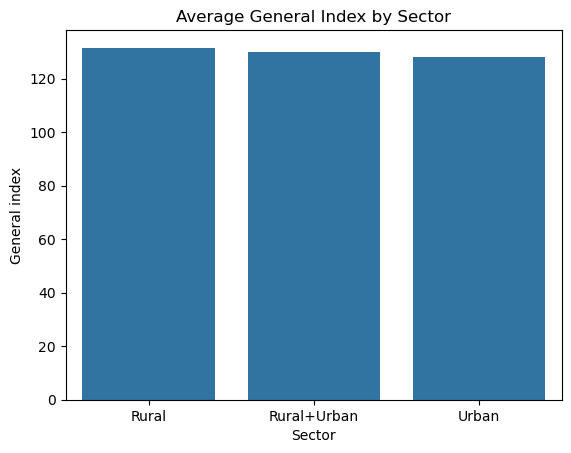

In [40]:
mean_by_sector = data.groupby('Sector')['General index'].mean().reset_index()
sns.barplot(data=mean_by_sector, x='Sector', y='General index')
plt.title("Average General Index by Sector")
plt.show()


<div style="font-family: Arial, sans-serif; max-width: 1800px; margin: auto;">
  <h2 style="color: #2c3e50;">Interpretation of "Average General Index by Sector"</h2>
  
  <p>
    The bar plot titled <strong>"Average General Index by Sector"</strong> visualizes the average values of the <strong>General Index</strong> across three sectors: 
    <strong>Rural</strong>, <strong>Rural+Urban</strong>, and <strong>Urban</strong>.
  </p>

  <h3 style="color: #34495e;">Key Observations:</h3>
  <ul>
    <li><strong>All three sectors show very similar average values</strong> for the General Index.</li>
    <li>The <strong>Rural</strong> sector has the highest average value, followed closely by <strong>Rural+Urban</strong>, and then <strong>Urban</strong>.</li>
    <li>The differences between the sectors are minimal, suggesting that the <strong>General Index is relatively consistent across these sectors</strong>.</li>
  </ul>

  <h3 style="color: #34495e;">Conclusion:</h3>
  <p>
    The data indicates that there is <strong>no significant variation</strong> in the General Index among the different sectors. This could imply either:
  </p>
  <ul>
    <li>Stable performance or conditions across sectors, or</li>
    <li>Low variability within each sector leading to similar averages.</li>
  </ul>

  <p style="font-weight: bold; color: #2980b9;">
    Final Insight: The sectors show very similar average General Index values.
  </p>
</div>

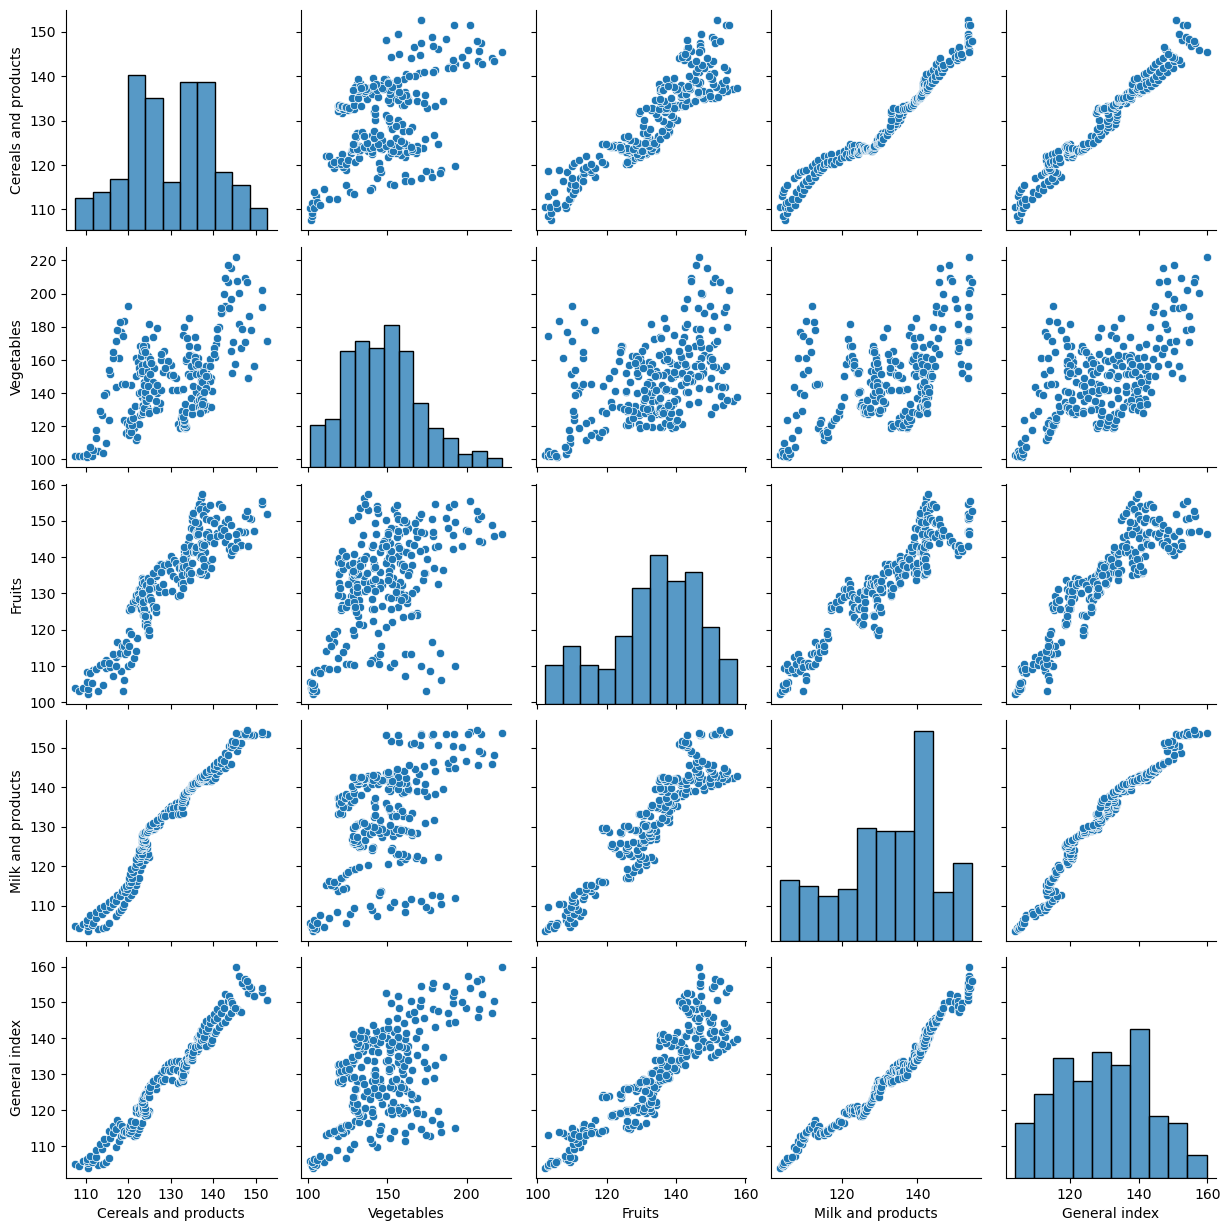

In [43]:
subset = data[['Cereals and products', 'Vegetables', 'Fruits', 'Milk and products', 'General index']]
sns.pairplot(subset)
plt.show()

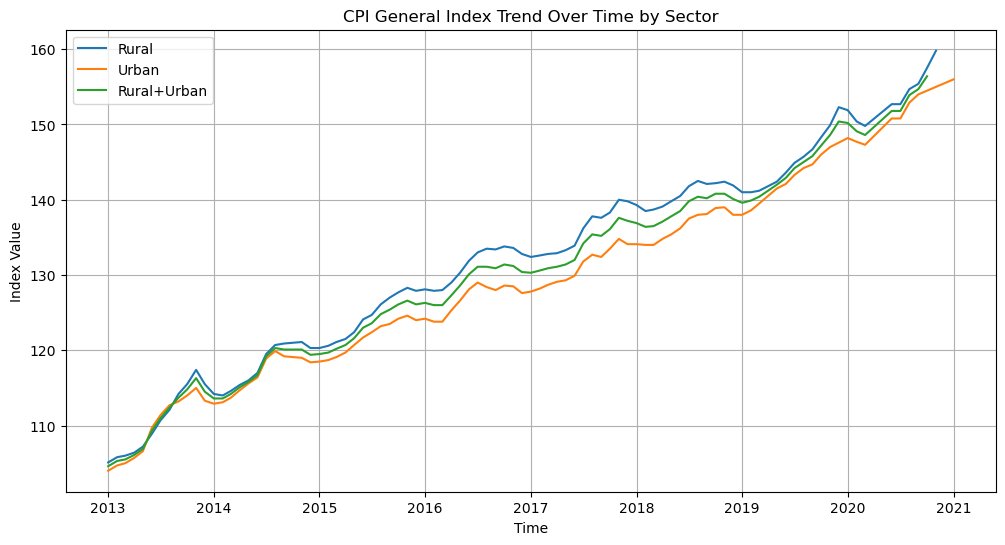

In [44]:

# Create Date column
data['Date'] = data['Month'] + ' ' + data['Year'].astype(str)
data['Date'] = pd.to_datetime(data['Date'])

# Plot
plt.figure(figsize=(12,6))
for sector in data['Sector'].unique():
    subset = data[data['Sector'] == sector]
    plt.plot(subset['Date'], subset['General index'], label=sector)

plt.title("CPI General Index Trend Over Time by Sector")
plt.xlabel("Time")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.show()

<style>
  body {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background-color: #f9f9f9;
    color: #333;
    line-height: 1.6;
    padding: 20px;
  }

  .container {
    max-width: 800px;
    margin: auto;
    background: #fff;
    padding: 30px;
    border-radius: 10px;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
  }

  h2 {
    color: #2c3e50;
    border-bottom: 2px solid #ddd;
    padding-bottom: 10px;
  }

  h3 {
    color: #34495e;
  }

  ul {
    margin-top: 10px;
    padding-left: 20px;
  }

  p {
    margin-top: 10px;
  }

  .final-box {
    background-color: #e8f4ff;
    padding: 15px 20px;
    border-left: 5px solid #3498db;
    font-weight: bold;
    color: #2c3e50;
    margin-top: 20px;
    border-radius: 5px;
  }
</style>

<div class="container">
  <h2>Interpretation of "CPI General Index Trend Over Time by Sector"</h2>

  <p>
    The line chart titled <strong>"CPI General Index Trend Over Time by Sector"</strong> visualizes the Consumer Price Index (CPI) for three sectors:
    <strong>Rural</strong>, <strong>Urban</strong>, and <strong>Rural+Urban</strong>. Below is a detailed interpretation of the observed trends.
  </p>

  <h3>Overall Trends</h3>
  <ul>
    <li><strong>All sectors show an upward trend</strong> from 2013 to 2021, indicating consistent inflation.</li>
    <li>A notable acceleration occurred after 2019, likely influenced by economic disruptions like the global pandemic or supply chain issues.</li>
  </ul>

  <h3>Sector-Specific Observations</h3>
  <ul>
    <li><strong>Rural Sector:</strong> Started with the lowest index but experienced the sharpest increase post-2019, surpassing other sectors by 2021.</li>
    <li><strong>Urban Sector:</strong> Maintained moderate growth throughout the period, showing some fluctuations but remained below Rural by the end.</li>
    <li><strong>Rural+Urban Sector:</strong> Followed a smooth trajectory, staying between the two individual sectors most of the time.</li>
  </ul>

  <h3>Key Turning Points</h3>
  <ul>
    <li><strong>2014–2015:</strong> Slight dip across all sectors—possibly due to temporary demand or policy changes.</li>
    <li><strong>Post-2019:</strong> All sectors saw rapid price increases, especially in rural areas.</li>
  </ul>

  <h3>Relative Performance</h3>
  <ul>
    <li><strong>Rural > Urban > Rural+Urban</strong> by 2021.</li>
    <li>This suggests faster inflation in rural regions, possibly due to logistical challenges or regional economic shifts.</li>
  </ul>

  <h3>Possible Explanations</h3>
  <ul>
    <li>Supply chain disruptions during the pandemic may have disproportionately affected rural areas.</li>
    <li>Demand-side pressures and monetary policies could have varied between urban and rural populations.</li>
  </ul>

  <h3>Implications</h3>
  <ul>
    <li>The CPI rise indicates growing inflationary pressure across India.</li>
    <li>Rural populations appear to face higher cost-of-living increases, calling for targeted economic strategies.</li>
  </ul>

  <div class="final-box">
    Final Insight: The CPI General Index shows a consistent upward trend across all sectors, with a sharp acceleration post-2019. The Rural sector experiences the highest inflation, followed by the Urban and Rural+Urban sectors, indicating regional disparities in price increases.
  </div>
</div>

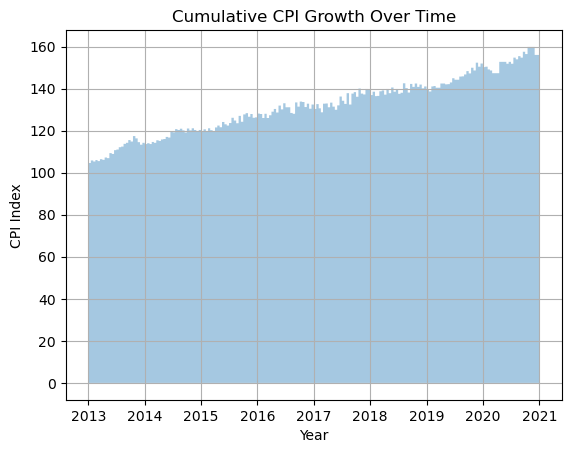

In [46]:
df_sorted = data.sort_values(by='Date')
plt.fill_between(df_sorted['Date'], df_sorted['General index'], step="mid", alpha=0.4)
plt.title("Cumulative CPI Growth Over Time")
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.grid(True)
plt.show()

<style>
    body {
      font-family: 'Poppins', sans-serif;
      background-color: #f4f1de;
      color: #333;
      margin: 0;
      padding: 0;
      display: flex;
      justify-content: center;
      align-items: center;
      min-height: 100vh;
    }

    .container {
      max-width: 900px;
      background: #fff;
      padding: 20px;
      border-radius: 15px;
      box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
      text-align: center;
    }

    h1 {
      color: #2c3e50;
      font-size: 2.5rem;
      margin-bottom: 20px;
    }

    h2 {
      color: #34495e;
      font-size: 1.8rem;
      margin-bottom: 10px;
    }

    p {
      line-height: 1.6;
      margin-bottom: 15px;
    }

    .chart-container {
      width: 100%;
      height: 400px;
      margin-bottom: 20px;
    }

    img {
      width: 100%;
      border-radius: 10px;
      box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
    }

    .insight {
      margin-top: 20px;
      display: flex;
      flex-direction: column;
      gap: 15px;
    }

    .insight-item {
      display: flex;
      align-items: center;
      gap: 10px;
    }

    .icon {
      font-size: 2rem;
      color: #2ecc71;
    }

    .highlight {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>

<div class="container">
  <h1>Insights from Cumulative CPI Growth Over Time</h1>

  <!-- Chart Image -->
  <div class="chart-container">
    <img src="Cumulative_CPI_Growth_Over_Time.png" alt="Cumulative CPI Growth Over Time">
  </div>

  <!-- Key Observations -->
  <h2>Key Observations</h2>
  <p>
    The chart titled <strong>"Cumulative CPI Growth Over Time"</strong> illustrates the trend of the Consumer Price Index (CPI) over the years from 2013 to 2021. Below are the key insights:
  </p>

  <!-- Insights with Icons -->
  <div class="insight">
    <div class="insight-item">
      <span class="icon">📈</span>
      <p><strong>Steady Increase:</strong> The CPI shows a consistent upward trend throughout the period, indicating persistent inflation.</p>
    </div>
    <div class="insight-item">
      <span class="icon">🔥</span>
      <p><strong>Acceleration Post-2019:</strong> A notable surge in CPI growth is observed after 2019, suggesting heightened inflationary pressures.</p>
    </div>
    <div class="insight-item">
      <span class="icon">📊</span>
      <p><strong>Pre-2019 Stability:</strong> Before 2019, the CPI growth was relatively stable, with minor fluctuations.</p>
    </div>
    <div class="insight-item">
      <span class="icon">⏰</span>
      <p><strong>Recent Spike:</strong> The most significant increase occurs between 2020 and 2021, reflecting global economic disruptions like the COVID-19 pandemic.</p>
    </div>
    <div class="insight-item">
      <span class="icon">🔍</span>
      <p><strong>Potential Drivers:</strong> Factors such as supply chain disruptions, rising commodity prices, and monetary policy changes may have contributed to the recent spike.</p>
    </div>
  </div>

  <!-- Final Note -->
  <h2>Final Thoughts</h2>
  <p>
    The cumulative CPI growth highlights the long-term trend of increasing prices across goods and services. The acceleration post-2019 underscores the need for policymakers to address inflationary pressures effectively.
  </p>

  <p class="highlight">
    📊 <strong>Key Takeaway:</strong> The CPI has shown steady growth since 2013, with a sharp rise after 2019, driven by global economic challenges.
  </p>
</div>


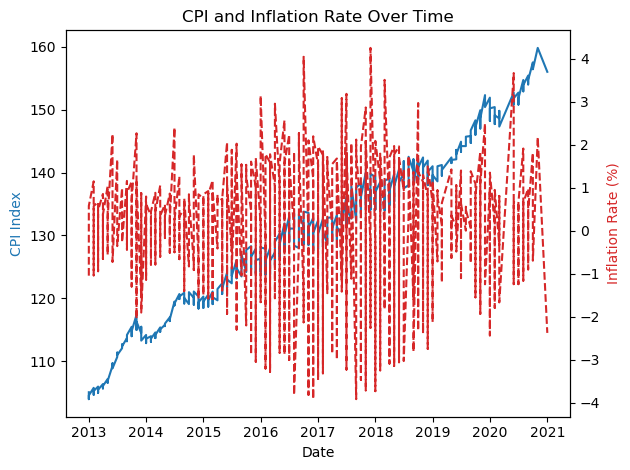

In [48]:
data_sorted = data.sort_values(by='Date').reset_index(drop=True)
data_sorted['Inflation_Rate'] = data_sorted['General index'].pct_change() * 100 

fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Index', color='tab:blue')
ax1.plot(data_sorted['Date'], data_sorted['General index'], color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate (%)', color='tab:red')
ax2.plot(data_sorted['Date'], data_sorted['Inflation_Rate'], color='tab:red', linestyle='--')

plt.title("CPI and Inflation Rate Over Time")
fig.tight_layout()
plt.show()

<style>  
    body {
      font-family: 'Poppins', sans-serif;
      background-color: #f4f1de;
      color: #333;
      margin: 0;
      padding: 20px;
      display: flex;
      justify-content: center;
      align-items: center;
      min-height: 100vh;
    }

    .container {
      max-width: 900px;
      background: #fff;
      padding: 20px;
      border-radius: 15px;
      box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
      text-align: center;
    }

    h1 {
      color: #2c3e50;
      font-size: 2.5rem;
      margin-bottom: 20px;
    }

    h2 {
      color: #34495e;
      font-size: 1.8rem;
      margin-bottom: 10px;
    }

    p {
      line-height: 1.6;
      margin-bottom: 15px;
    }

    .chart-container {
      width: 100%;
      height: 400px;
      margin-bottom: 20px;
    }

    img {
      width: 100%;
      border-radius: 10px;
      box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
    }

    .insight {
      margin-top: 20px;
      display: flex;
      flex-direction: column;
      gap: 15px;
    }

    .insight-item {
      display: flex;
      align-items: center;
      gap: 10px;
    }

    .icon {
      font-size: 2rem;
      color: #2ecc71;
    }

    .highlight {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>

<div class="container">
  <h1>Insights from CPI and Inflation Rate Over Time</h1>

  <!-- Chart Image -->
  <div class="chart-container">
    <img src="CPI_and_Inflation_Rate_Over_Time.png" alt="CPI and Inflation Rate Over Time">
  </div>

  <!-- Key Observations -->
  <h2>Key Observations</h2>
  <p>
    The chart titled <strong>"CPI and Inflation Rate Over Time"</strong> illustrates the trend of the Consumer Price Index (CPI) and its corresponding inflation rate over time. Below are the key insights:
  </p>

  <!-- Insights with Icons -->
  <div class="insight">
    <div class="insight-item">
      <span class="icon">📈</span>
      <p><strong>Steady CPI Growth:</strong> The CPI shows a consistent upward trend throughout the period, indicating persistent inflation.</p>
    </div>
    <div class="insight-item">
      <span class="icon">🔥</span>
      <p><strong>Acceleration Post-2019:</strong> A notable surge in CPI growth is observed after 2019, reflecting heightened inflationary pressures.</p>
    </div>
    <div class="insight-item">
      <span class="icon">📊</span>
      <p><strong>Inflation Rate Volatility:</strong> The inflation rate exhibits significant fluctuations, especially during economic disruptions like the COVID-19 pandemic.</p>
    </div>
    <div class="insight-item">
      <span class="icon">⏰</span>
      <p><strong>Recent Spike:</strong> The most pronounced increase in both CPI and inflation rate occurs between 2020 and 2021, likely due to global economic challenges.</p>
    </div>
    <div class="insight-item">
      <span class="icon">🔍</span>
      <p><strong>Potential Drivers:</strong> Factors such as supply chain disruptions, rising commodity prices, and monetary policy changes may have contributed to the recent spike.</p>
    </div>
  </div>

  <!-- Final Thoughts -->
  <h2>Final Thoughts</h2>
  <p>
    The chart highlights the long-term trend of increasing prices across goods and services, with a sharp acceleration post-2019. This underscores the need for policymakers to address inflationary pressures effectively.
  </p>

  <p class="highlight">
    📊 <strong>Key Takeaway:</strong> The CPI has shown steady growth since 2013, with a significant rise after 2019, driven by global economic challenges.
  </p>
</div>



In [50]:

# Get float columns
float_cols = data.select_dtypes(include='float').columns

# Determine number of rows needed for 3 plots per row
n_cols = 3
n_rows = math.ceil(len(float_cols) / n_cols)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot each histogram
for i, col in enumerate(float_cols):
    sns.histplot(ax=axes[i], data=data, x=col, kde=True)
    axes[i].set_title(f"Histogram of {col}")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'math' is not defined

1. General Observations
Shape of Distributions : Most histograms exhibit a unimodal distribution, meaning they have a single peak. This suggests that prices tend to cluster around certain values.
Range of Values : The range of values varies across categories:
Some categories like Cereals and products , Meat and fish , and Eggs have higher price ranges compared to others like Spices or Non-alcoholic beverages .
Skewness :
Many distributions appear slightly right-skewed , indicating that there are more frequent occurrences of lower prices/indices, with fewer occurrences at higher values.
For example, Fruits and Sugar and Confectionery show noticeable right skewness.
KDE Curves : The smooth curves overlaid on the histograms (Kernel Density Estimation - KDE) provide a visual representation of the underlying probability density function, helping to identify trends and patterns in the data.


<div style="text-align: center; color: black; font-size: 40px; font-weight: bold;"> Ordinal Encoding</div>


In [58]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data['Month'] = data['Month'].map(month_map) # Convert month names to numbers for machine learning models that work better with numerical data
data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date
0,Rural,2013,1,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,2013-01-01
1,Urban,2013,1,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,2013-01-01
2,Rural+Urban,2013,1,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
3,Rural,2013,2,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,2013-02-01
4,Urban,2013,2,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7,2013-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Rural+Urban,2020,9,148.4,187.1,152.5,153.6,138.2,150.9,186.7,...,142.9,148.7,155.6,139.6,146.6,157.5,158.4,150.0,154.7,2020-09-01
276,Rural,2020,10,146.0,186.3,159.2,153.6,142.6,147.2,200.6,...,146.8,152.0,159.5,146.4,152.4,162.5,156.2,154.3,157.5,2020-10-01
278,Rural+Urban,2020,10,147.5,188.9,161.4,153.6,140.1,151.2,209.2,...,143.1,148.7,156.3,140.6,146.5,158.5,157.0,150.4,156.4,2020-10-01
279,Rural,2020,11,145.4,188.6,171.6,153.8,145.4,146.5,222.2,...,147.5,152.8,160.4,146.1,153.6,161.6,156.2,154.5,159.8,2020-11-01


<div style="text-align: center; color: black; font-size: 40px; font-weight: bold;">One-Hot Encoding or Label Encoding</div>


In [61]:
data = pd.get_dummies(data, columns=['Sector'], drop_first=True) # One-hot encoding converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.


In [63]:
data

,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,...,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date,Sector_Rural+Urban,Sector_Urban
0,2013,1,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,...,104.0,103.3,103.4,103.8,104.7,104.0,105.1,2013-01-01,False,False
1,2013,1,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,...,104.1,103.2,102.9,103.5,104.3,103.7,104.0,2013-01-01,False,True
2,2013,1,108.4,107.3,110.0,104.4,105.1,103.2,102.2,106.0,...,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01,True,False
3,2013,2,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,...,104.4,103.9,104.0,104.1,104.6,104.4,105.8,2013-02-01,False,False
4,2013,2,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,...,104.7,104.4,103.3,103.7,104.3,104.3,104.7,2013-02-01,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2020,9,148.4,187.1,152.5,153.6,138.2,150.9,186.7,149.8,...,155.6,139.6,146.6,157.5,158.4,150.0,154.7,2020-09-01,True,False
276,2020,10,146.0,186.3,159.2,153.6,142.6,147.2,200.6,150.3,...,159.5,146.4,152.4,162.5,156.2,154.3,157.5,2020-10-01,False,False
278,2020,10,147.5,188.9,161.4,153.6,140.1,151.2,209.2,150.9,...,156.3,140.6,146.5,158.5,157.0,150.4,156.4,2020-10-01,True,False
279,2020,11,145.4,188.6,171.6,153.8,145.4,146.5,222.2,155.9,...,160.4,146.1,153.6,161.6,156.2,154.5,159.8,2020-11-01,False,False


In [84]:
X = data.drop(columns=["General index","Date"])
X

,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,Sector_Rural+Urban,Sector_Urban
0,2013,1,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,False,False
1,2013,1,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,...,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,False,True
2,2013,1,108.4,107.3,110.0,104.4,105.1,103.2,102.2,106.0,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,True,False
3,2013,2,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,...,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,False,False
4,2013,2,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,...,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2020,9,148.4,187.1,152.5,153.6,138.2,150.9,186.7,149.8,...,142.9,148.7,155.6,139.6,146.6,157.5,158.4,150.0,True,False
276,2020,10,146.0,186.3,159.2,153.6,142.6,147.2,200.6,150.3,...,146.8,152.0,159.5,146.4,152.4,162.5,156.2,154.3,False,False
278,2020,10,147.5,188.9,161.4,153.6,140.1,151.2,209.2,150.9,...,143.1,148.7,156.3,140.6,146.5,158.5,157.0,150.4,True,False
279,2020,11,145.4,188.6,171.6,153.8,145.4,146.5,222.2,155.9,...,147.5,152.8,160.4,146.1,153.6,161.6,156.2,154.5,False,False


In [86]:
y = data["General index"]
y

0      105.1
1      104.0
2      104.6
3      105.8
4      104.7
       ...  
275    154.7
276    157.5
278    156.4
279    159.8
286    156.0
Name: General index, Length: 273, dtype: float64

In [88]:
sc = StandardScaler()

In [92]:
x = sc.fit_transform(X)

In [94]:
#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True, stratify=None)

In [96]:
model = LinearRegression()

In [98]:
model.fit(x_train, y_train)


LinearRegression()

In [101]:
y_pred = model.predict(x_test)


In [104]:
r2_score(y_test, y_pred)


0.9996918683873578

The R² score measures the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (x). It ranges from 0 to 1, where:

1 indicates a perfect fit (all variance explained).
0 indicates no relationship between the features and the target.
Insights :

The R² score for the test set is extremely high (0.99969), suggesting that the model explains almost all the variance in the test data.
This indicates excellent predictive performance on unseen data.

In [108]:
model.score(x_test, y_test)


0.9996918683873578

In [111]:
model.score(x_train, y_train)


0.999832481695352

In [114]:
mean_absolute_error(y_test, y_pred)


0.18202892090253742

In [117]:
mean_squared_error(y_test, y_pred)


0.05519946105139523

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))


0.2349456555278161

In [123]:
# Recreate OUTPUT (if needed)
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

# Safely extract scalar from nested array, list, or any object
def extract_scalar(val):
    if isinstance(val, (list, np.ndarray)) and len(val) > 0:
        return val[0]
    return val

# Apply to both columns
OUTPUT['ACTUAL'] = OUTPUT['ACTUAL'].apply(extract_scalar)
OUTPUT['PREDICTION'] = OUTPUT['PREDICTION'].apply(extract_scalar)

# Convert to numeric (in case types are still mixed)
OUTPUT['ACTUAL'] = pd.to_numeric(OUTPUT['ACTUAL'], errors='coerce')
OUTPUT['PREDICTION'] = pd.to_numeric(OUTPUT['PREDICTION'], errors='coerce')

# Drop rows with NaNs (if any)
OUTPUT.dropna(inplace=True)

# Final check
print(OUTPUT.head())


   ACTUAL  PREDICTION
0   117.4  117.320547
1   129.0  128.795527
2   119.1  119.302492
3   140.8  140.757097
4   141.9  141.730313


In [126]:

mae = mean_absolute_error(OUTPUT['ACTUAL'], OUTPUT['PREDICTION'])
mse = mean_squared_error(OUTPUT['ACTUAL'], OUTPUT['PREDICTION'])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.18
MSE: 0.06
RMSE: 0.23


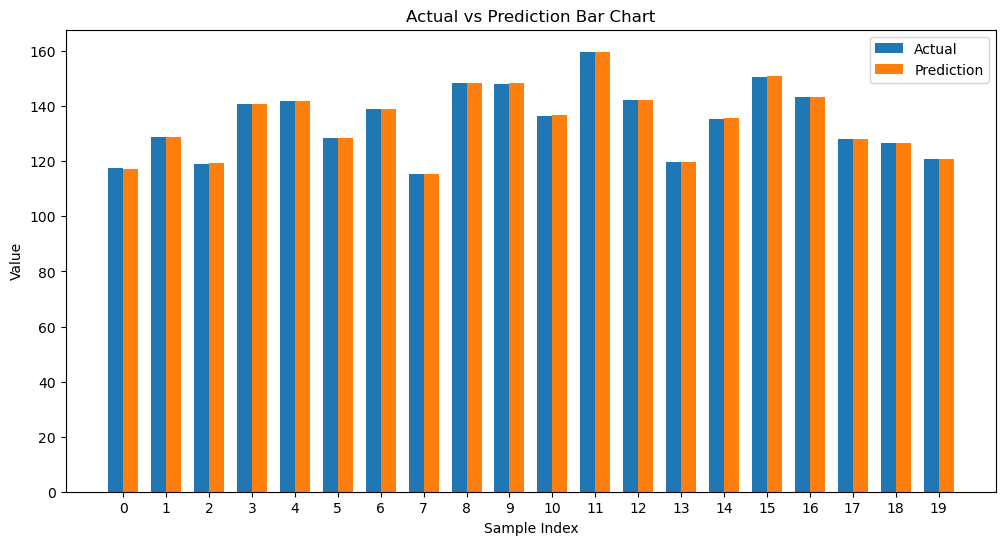

In [144]:
n_samples=20

data_plot = OUTPUT.head(n_samples)

indices = np.arange(len(data_plot))
plt.figure(figsize=(12,6))
bar_width = 0.35
# Bars for ACTUAL values
plt.bar(indices, data_plot['ACTUAL'], width=bar_width, label='Actual')

# Bars for PREDICTION values, shifted by bar_width
plt.bar(indices + bar_width, data_plot['PREDICTION'], width=bar_width, label='Prediction')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Prediction Bar Chart')
plt.xticks(indices + bar_width / 2, indices)  # set x-ticks to be between the grouped bars
plt.legend()
plt.show()